In [46]:
import numpy as np
import string
import re
from tabulate import tabulate
import pandas as pd
import random
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [47]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
file_path = "/content/drive/My Drive/Dissertation/fake_job_postings.csv"

# Load the CSV file into a DataFrame
jobs = pd.read_csv(file_path)


In [49]:
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [50]:
jobs = pd.read_csv(file_path)
jobs

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [51]:
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [52]:
jobs[['title']].describe()

,title
count,17880
unique,11231
top,English Teacher Abroad
freq,311


In [53]:
jobs.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
jobs.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<Axes: >

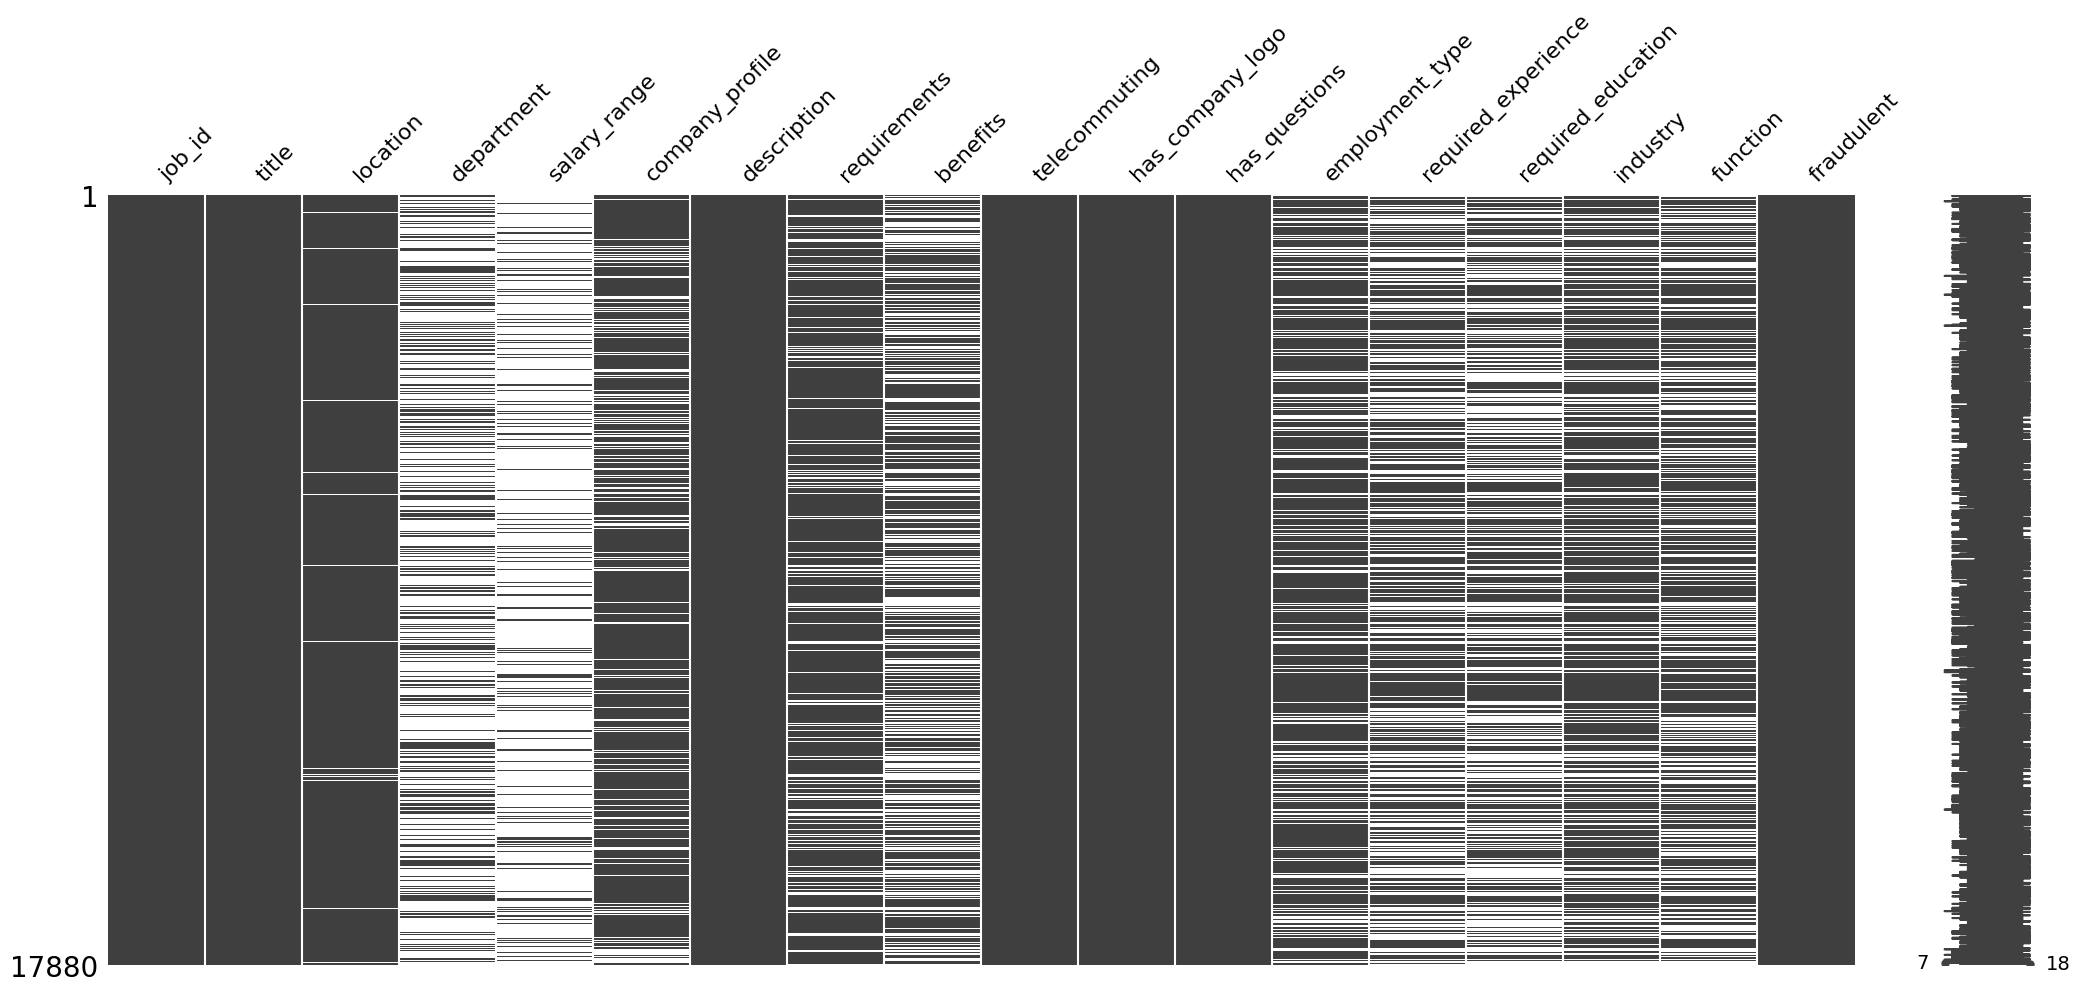

In [55]:
msno.matrix(jobs)

As we an see that there are a lot of null values in our dataset.

In [56]:
print(jobs.columns)
jobs.describe()

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


After describing our data using the describe() function, we get to know that their are 4 columns named job_id, telecommuting, has_company_logo and has_questions features which have numerical data. So we can easily remove these columns as they stand no relevancy in the text classification problem.

'fradulent' column also has numerical data and it can be used to train our model and predicted for accuracy.

,fraudulent,title
0,0,17014
1,1,866


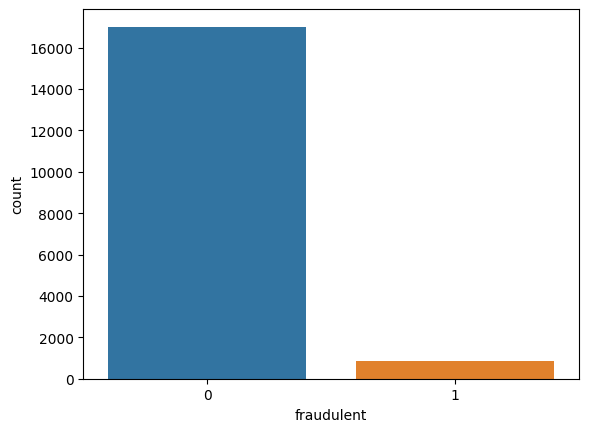

In [57]:
sns.countplot(x = "fraudulent", data = jobs)
jobs.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

In [58]:
# Ensure the 'fraudulent' column is properly formatted as categorical
jobs['fraudulent'] = jobs['fraudulent'].astype('category')


*   From the plot we can observe that their are few fraud jobs posted.

*   As our data is very much imbalanced so we try to make a good classifier.

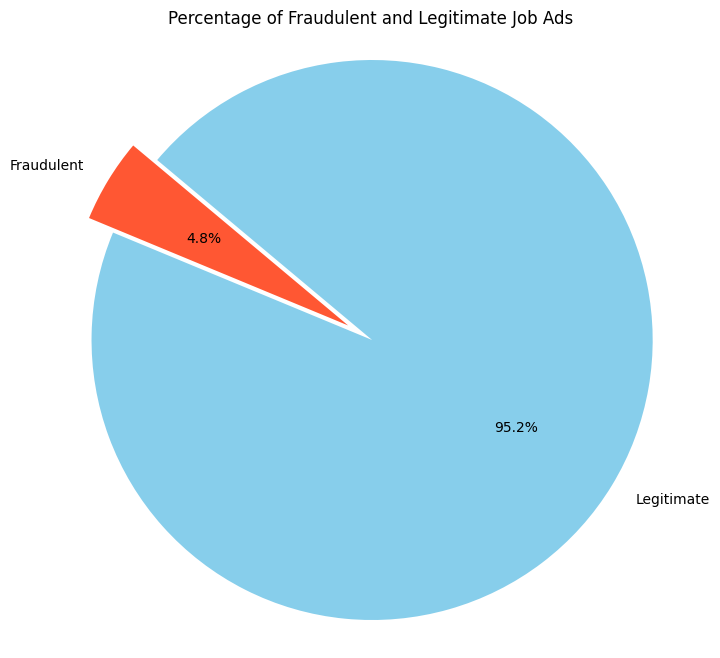

In [59]:
# Data
fraudulent_count = 866
legitimate_count = 17014
total_count = fraudulent_count + legitimate_count

# Labels
labels = ['Fraudulent', 'Legitimate']

# Data values
sizes = [fraudulent_count, legitimate_count]

# Colors
colors = ['#FF5733', '#87CEEB']  # Red for Fraudulent, Blue for Legitimate

# Explode the first slice (Fraudulent)
explode = (0.1, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Title
plt.title('Percentage of Fraudulent and Legitimate Job Ads')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Now Lets fill the nan values and get rid of the columns which are of no use to make things simpler.

In [60]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del jobs[col]

jobs.fillna(' ', inplace=True)

In [61]:
jobs.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Lets check which country posts most number of jobs

In [62]:
def split(location):
    l = location.split(',')
    return l[0]

jobs['country'] = jobs.location.apply(split)

In [63]:
jobs.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


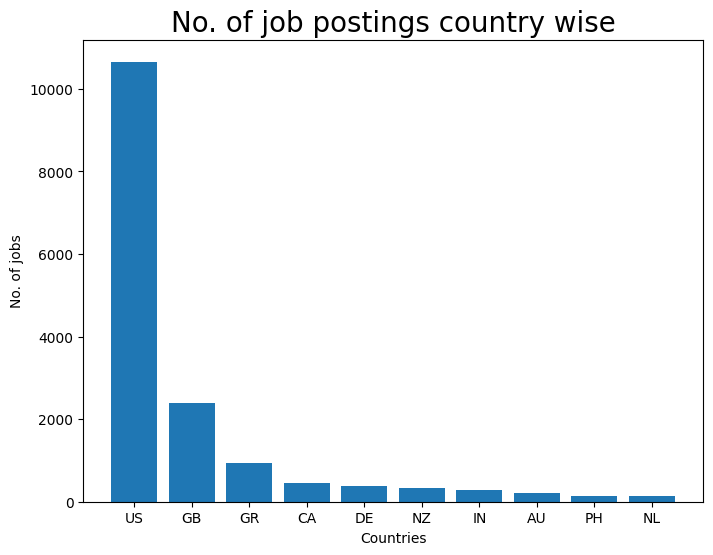

In [64]:
country = dict(jobs.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('No. of job postings country wise', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)
plt.grid(False)

Above plot states that most number of jobs are posted by US.

Now lets verify which type of experience (required_experience) is required for most number of jobs.

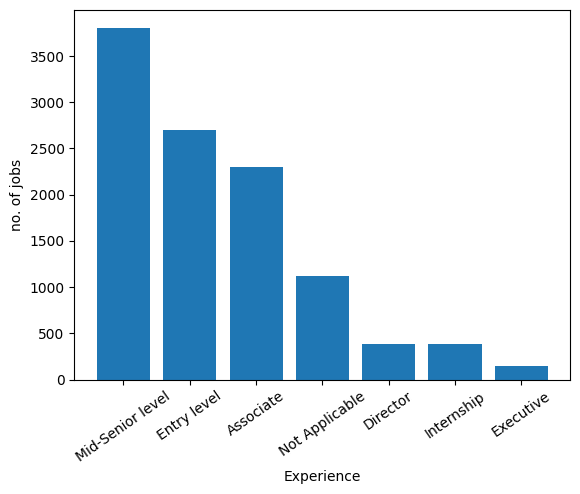

In [65]:
experience = dict(jobs.required_experience.value_counts())
del experience[' ']
plt.bar(experience.keys(), experience.values())
plt.xlabel('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation=35)
plt.grid(False)
plt.show()

In [66]:
# Title of jobs which are frequently advertised
print(jobs.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [67]:
jobs.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


Now we should combine our text in a single column to start cleaning our data

In [68]:
jobs['text']=jobs['title']+' '+jobs['location']+' '+jobs['company_profile']+' '+jobs['description']+' '+jobs['requirements']+' '+jobs['benefits']
# jobs['text'] = f"{jobs['title']} {jobs['location']} {jobs['company_profile']} {jobs['description']} {jobs['requirements']} {jobs['benefits']}"
del jobs['title']
del jobs['location']
del jobs['department']
del jobs['company_profile']
del jobs['description']
del jobs['requirements']
del jobs['benefits']
del jobs['required_experience']
del jobs['required_education']
del jobs['industry']
del jobs['function']
del jobs['country']

In [69]:
jobs.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


Now lets see what type of words are frequent in fraudulent and actual jobs, using "Worldclouds"

In [70]:
fraudjobs_text = jobs[jobs.fraudulent==1].text
actualjobs_text = jobs[jobs.fraudulent==0].text

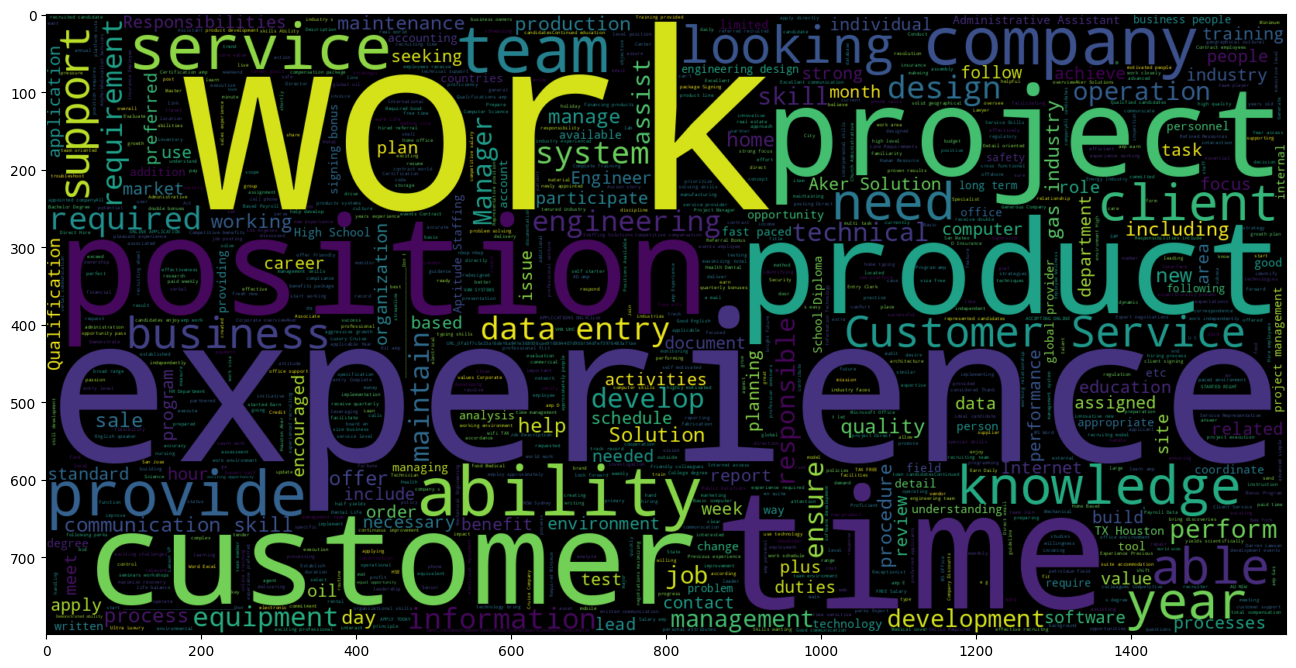

In [71]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.grid(False)

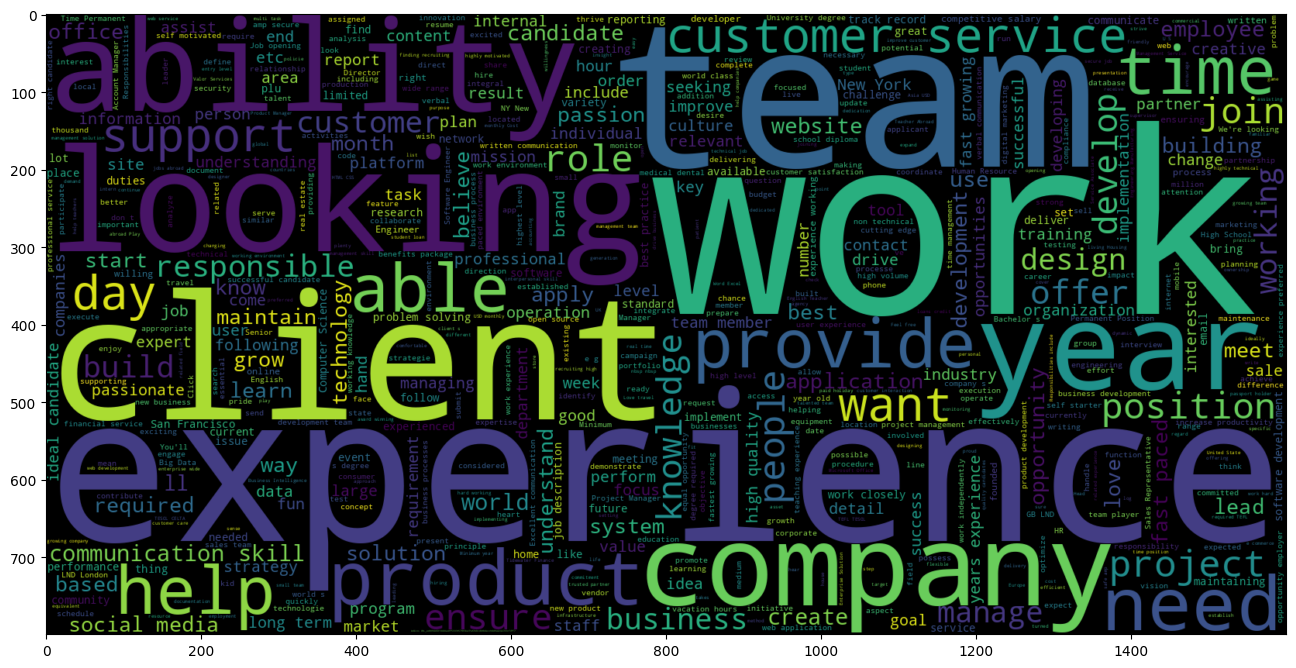

In [72]:
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.grid(False)

In [73]:
train_text , test_text , train_category , test_category = train_test_split(jobs.text,jobs.fraudulent , test_size=0.2 , random_state = 0)

In [74]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_text)
#transformed test reviews
cv_test_reviews=cv.transform(test_text)

print('BOW_cv_train:' ,cv_train_reviews.shape)
print('BOW_cv_test:' ,cv_test_reviews.shape)

BOW_cv_train: (14304, 1622361)
BOW_cv_test: (3576, 1622361)


In [75]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(train_text)
#transformed test reviews
tv_test_reviews=tv.transform(test_text)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (14304, 1622361)
Tfidf_test: (3576, 1622361)


In [76]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_category)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_category)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [77]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [115]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_category,mnb_bow_predict)
print("Bag of Word - Accuracy score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_category,mnb_tfidf_predict)
print("TF-IDF - Accuracy score :",mnb_tfidf_score)

Bag of Word - Accuracy score : 0.9432326621923938
TF-IDF - Accuracy score : 0.9572147651006712


In [101]:
mnb_bow_report = classification_report(test_category,mnb_bow_predict,target_names = ['legitimate','fraudulent'])
print(mnb_bow_report)
mnb_tfidf_report = classification_report(test_category,mnb_tfidf_predict,target_names = ['legitimate','fraudulent'])
print(mnb_tfidf_report)


              precision    recall  f1-score   support

  legitimate       0.97      0.97      0.97      3423
  fraudulent       0.33      0.32      0.33       153

    accuracy                           0.94      3576
   macro avg       0.65      0.65      0.65      3576
weighted avg       0.94      0.94      0.94      3576

              precision    recall  f1-score   support

  legitimate       0.96      1.00      0.98      3423
  fraudulent       0.00      0.00      0.00       153

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.92      0.96      0.94      3576



In [80]:
cm_cv = confusion_matrix(test_category,mnb_bow_predict)
cm_tv = confusion_matrix(test_category,mnb_tfidf_predict)
cm_cv , cm_tv

(array([[3324,   99],
        [ 104,   49]]),
 array([[3423,    0],
        [ 153,    0]]))

In [81]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'
cm_tv = pd.DataFrame(cm_tv, index=[0,1], columns=[0,1])
cm_tv.index.name = 'Actual'
cm_tv.columns.name = 'Predicted'


<Axes: xlabel='Predicted', ylabel='Actual'>

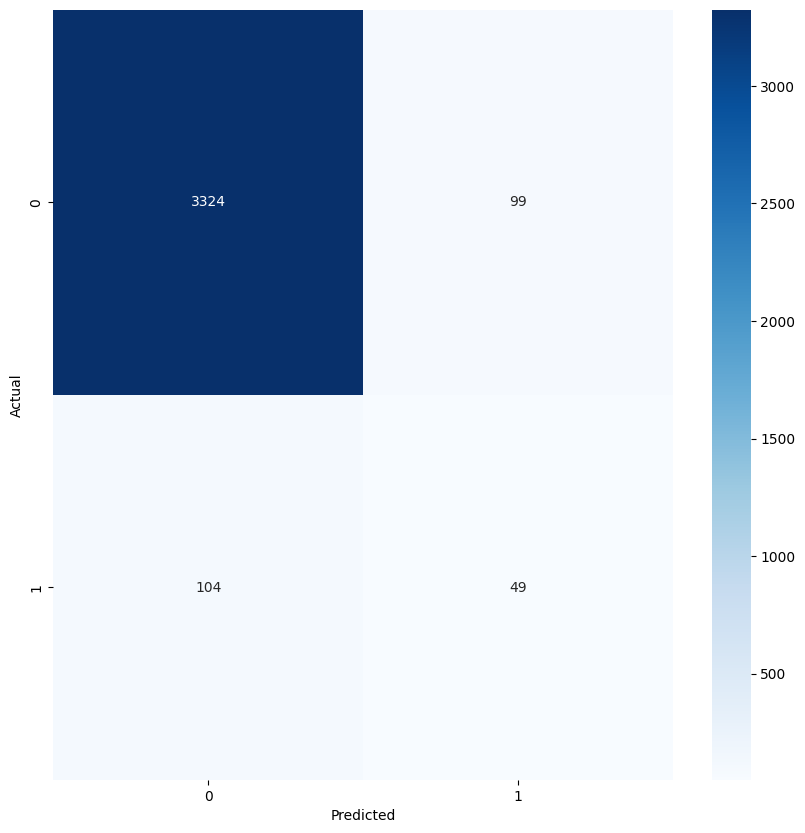

In [82]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm_cv,cmap="Blues",annot = True, fmt='')

<Axes: xlabel='Predicted', ylabel='Actual'>

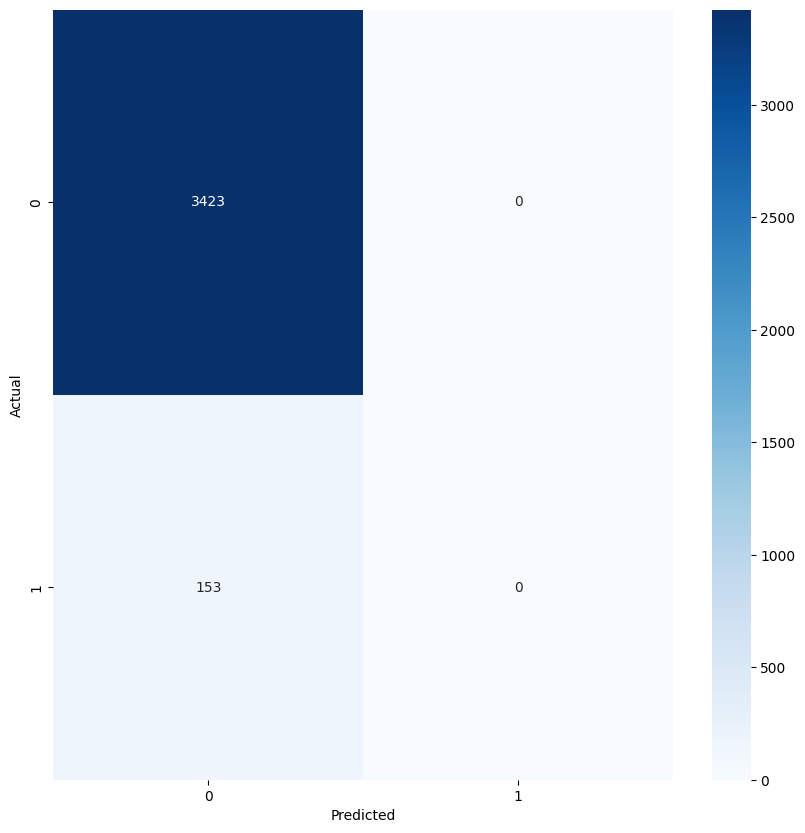

In [83]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_tv,cmap= "Blues",annot = True, fmt='')

## Cleaning Data

Creating a function that accepts a sentence as input and processes
the sentence into tokens, performing lemmatization, lowercasing, and removing stop words.



In [84]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.text.lower().strip() if word.text != "-PRON-" else word.text for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens


In [85]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [86]:
# creating our bag of words
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,3))

BoW converts text into the matrix of occurrence of words within a given document. It focuses on whether given words occurred or not in the document, and it generates a matrix that we might see referred to as a BoW matrix or a document term matrix.

In [87]:
# splitting our data in train and test
X_train, X_test, y_train, y_test = train_test_split(jobs.text, jobs.fraudulent, test_size=0.3)

# Creating Model

We are creating a pipeline with three components: a cleaner, a vectorizer, and a classifier. The cleaner uses our predictors class object to clean and preprocess the text. The vectorizer uses countvector objects to create the bag of words matrix for our text. The classifier is an object that performs the logistic regression to classify the sentiments.

In [113]:
def models(x):

  if x == LogisticRegression:
    clf = LogisticRegression()

  elif x == RandomForestClassifier:
    clf = RandomForestClassifier()

  elif x == SVC:
    clf = SVC()

  else:
    print("wrong input")
    exit()

  # Create pipeline using Bag of Words
  pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])
  # Fitting model
  pipe.fit(X_train, y_train)

  # Predicting with a test dataset
  predicted = pipe.predict(X_test)

  # Model Accuracy
  print(x , "Accuracy: " , accuracy_score(y_test, predicted))
  print(x , "Recall: ", recall_score(y_test, predicted))




#plot confusion matrix
  cm = confusion_matrix(y_test, predicted)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['legitimate','fraudulent'])

  disp = disp.plot(cmap="Blues", values_format='')
  plt.grid(False)
  plt.show()
  return predicted


<class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy:  0.9858314690529456
<class 'sklearn.linear_model._logistic.LogisticRegression'> Recall:  0.7276264591439688


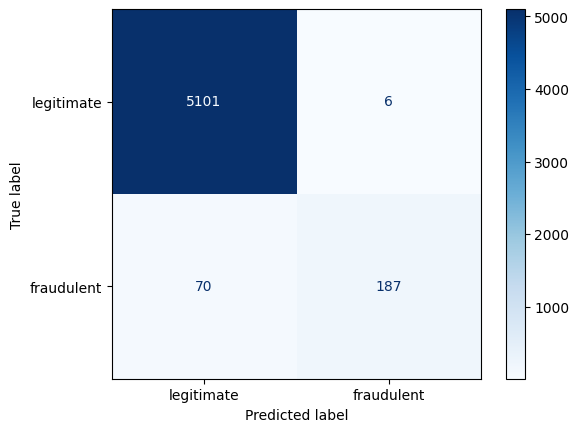

In [95]:
prediction = models(LogisticRegression)

In [96]:
print(classification_report(y_test,prediction,target_names = ['legitimate','fraudulent']))

              precision    recall  f1-score   support

  legitimate       0.99      1.00      0.99      5107
  fraudulent       0.97      0.73      0.83       257

    accuracy                           0.99      5364
   macro avg       0.98      0.86      0.91      5364
weighted avg       0.99      0.99      0.98      5364



<class 'sklearn.ensemble._forest.RandomForestClassifier'> Accuracy:  0.9837807606263982
<class 'sklearn.ensemble._forest.RandomForestClassifier'> Recall:  0.6809338521400778


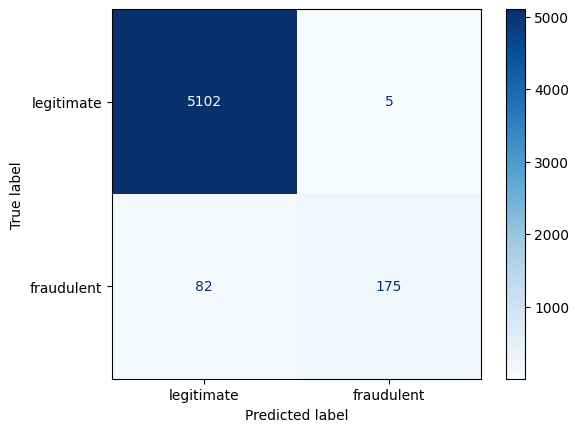

In [107]:
RFPrediction = models(RandomForestClassifier)

In [108]:
print(classification_report(y_test,RFPrediction,target_names = ['legitimate','fraudulent']))

              precision    recall  f1-score   support

  legitimate       0.98      1.00      0.99      5107
  fraudulent       0.97      0.68      0.80       257

    accuracy                           0.98      5364
   macro avg       0.98      0.84      0.90      5364
weighted avg       0.98      0.98      0.98      5364



<class 'sklearn.svm._classes.SVC'> Accuracy:  0.9783743475018642
<class 'sklearn.svm._classes.SVC'> Recall:  0.5525291828793775


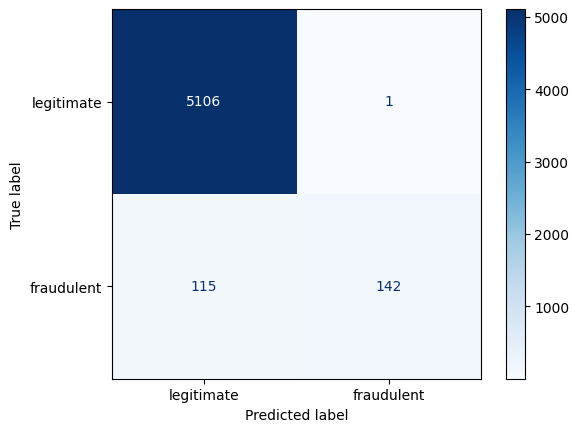

In [109]:
svcprediction = models(SVC)

In [110]:
print(classification_report(y_test,svcprediction,target_names = ['legitimate','fraudulent']))

              precision    recall  f1-score   support

  legitimate       0.98      1.00      0.99      5107
  fraudulent       0.99      0.55      0.71       257

    accuracy                           0.98      5364
   macro avg       0.99      0.78      0.85      5364
weighted avg       0.98      0.98      0.98      5364

